# Homework-2: MLP for MNIST Classification

### In this homework, you need to
- #### implement SGD optimizer (`./optimizer.py`)
- #### implement forward and backward for FCLayer (`layers/fc_layer.py`)
- #### implement forward and backward for SigmoidLayer (`layers/sigmoid_layer.py`)
- #### implement forward and backward for ReLULayer (`layers/relu_layer.py`)
- #### implement EuclideanLossLayer (`criterion/euclidean_loss.py`)
- #### implement SoftmaxCrossEntropyLossLayer (`criterion/softmax_cross_entropy.py`)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow.compat.v1 as tf
tf.disable_eager_execution()

from network import Network
from solver import train, test
from plot import plot_loss_and_acc

## Load MNIST Dataset
We use tensorflow tools to load dataset for convenience.

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
def decode_image(image):
    # Normalize from [0, 255.] to [0., 1.0], and then subtract by the mean value
    image = tf.cast(image, tf.float32)
    image = tf.reshape(image, [784])
    image = image / 255.0
    image = image - tf.reduce_mean(image)
    return image

def decode_label(label):
    # Encode label with one-hot encoding
    return tf.one_hot(label, depth=10)

In [4]:
# Data Preprocessing
x_train = tf.data.Dataset.from_tensor_slices(x_train).map(decode_image)
y_train = tf.data.Dataset.from_tensor_slices(y_train).map(decode_label)
data_train = tf.data.Dataset.zip((x_train, y_train))

x_test = tf.data.Dataset.from_tensor_slices(x_test).map(decode_image)
y_test = tf.data.Dataset.from_tensor_slices(y_test).map(decode_label)
data_test = tf.data.Dataset.zip((x_test, y_test))

## Set Hyerparameters
You can modify hyerparameters by yourself.

In [5]:
batch_size = 100
max_epoch = 10 #20
init_std = 0.01

learning_rate_SGD = 0.001 #0.001
weight_decay = 0.1

disp_freq = 50

## 1. MLP with Euclidean Loss
In part-1, you need to train a MLP with **Euclidean Loss**.  
**Sigmoid Activation Function** and **ReLU Activation Function** will be used respectively.
### TODO
Before executing the following code, you should complete **./optimizer.py** and **criterion/euclidean_loss.py**.

In [6]:
from criterion import EuclideanLossLayer
from optimizer import SGD

criterion = EuclideanLossLayer()

sgd = SGD(learning_rate_SGD, weight_decay)

## 1.1 MLP with Euclidean Loss and Sigmoid Activation Function
Build and train a MLP contraining one hidden layer with 128 units using Sigmoid activation function and Euclidean loss function.

### TODO
Before executing the following code, you should complete **layers/fc_layer.py** and **layers/sigmoid_layer.py**.

In [7]:
from layers import FCLayer, SigmoidLayer

sigmoidMLP = Network()
# Build MLP with FCLayer and SigmoidLayer
# 128 is the number of hidden units, you can change by your own
sigmoidMLP.add(FCLayer(784, 128))
sigmoidMLP.add(SigmoidLayer())
sigmoidMLP.add(FCLayer(128, 10))

In [8]:
sigmoidMLP, sigmoid_loss, sigmoid_acc = train(sigmoidMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Instructions for updating:
Use `for ... in dataset:` to iterate over a dataset. If using `tf.estimator`, return the `Dataset` object directly from your input function. As a last resort, you can use `tf.compat.v1.data.make_one_shot_iterator(dataset)`.
Epoch [0][10]	 Batch [0][550]	 Training Loss 3.8501	 Accuracy 0.1100
Epoch [0][10]	 Batch [50][550]	 Training Loss 1.4683	 Accuracy 0.0880
Epoch [0][10]	 Batch [100][550]	 Training Loss 1.0756	 Accuracy 0.0835
Epoch [0][10]	 Batch [150][550]	 Training Loss 0.9302	 Accuracy 0.0881
Epoch [0][10]	 Batch [200][550]	 Training Loss 0.8539	 Accuracy 0.0905
Epoch [0][10]	 Batch [250][550]	 Training Loss 0.8035	 Accuracy 0.0957
Epoch [0][10]	 Batch [300][550]	 Training Loss 0.7675	 Accuracy 0.0995
Epoch [0][10]	 Batch [350][550]	 Training Loss 0.7397	 Accuracy 0.1049
Epoch [0][10]	 Batch [400][550]	 Training Loss 0.7171	 Accuracy 0.1110
Epoch [0][10]	 Batch [450][550]	 Training Loss 0.6979	 Accuracy 0.1175
Epoch [0][10]	 Batch [500][550]	 Training 

Epoch [8][10]	 Batch [250][550]	 Training Loss 0.3024	 Accuracy 0.7077
Epoch [8][10]	 Batch [300][550]	 Training Loss 0.3024	 Accuracy 0.7077
Epoch [8][10]	 Batch [350][550]	 Training Loss 0.3034	 Accuracy 0.7070
Epoch [8][10]	 Batch [400][550]	 Training Loss 0.3032	 Accuracy 0.7074
Epoch [8][10]	 Batch [450][550]	 Training Loss 0.3034	 Accuracy 0.7080
Epoch [8][10]	 Batch [500][550]	 Training Loss 0.3035	 Accuracy 0.7083

Epoch [8]	 Average training loss 0.3031	 Average training accuracy 0.7099
Epoch [8]	 Average validation loss 0.2918	 Average validation accuracy 0.7578

Epoch [9][10]	 Batch [0][550]	 Training Loss 0.2869	 Accuracy 0.7300
Epoch [9][10]	 Batch [50][550]	 Training Loss 0.2974	 Accuracy 0.7257
Epoch [9][10]	 Batch [100][550]	 Training Loss 0.2975	 Accuracy 0.7281
Epoch [9][10]	 Batch [150][550]	 Training Loss 0.2990	 Accuracy 0.7236
Epoch [9][10]	 Batch [200][550]	 Training Loss 0.2998	 Accuracy 0.7218
Epoch [9][10]	 Batch [250][550]	 Training Loss 0.2997	 Accuracy 0.72

In [9]:
test(sigmoidMLP, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.7447.



## 1.2 MLP with Euclidean Loss and ReLU Activation Function
Build and train a MLP contraining one hidden layer with 128 units using ReLU activation function and Euclidean loss function.

### TODO
Before executing the following code, you should complete **layers/relu_layer.py**.

In [10]:
from layers import ReLULayer

reluMLP = Network()
# TODO build ReLUMLP with FCLayer and ReLULayer
reluMLP.add(FCLayer(784, 128))
reluMLP.add(ReLULayer())
reluMLP.add(FCLayer(128, 10))

In [11]:
reluMLP, relu_loss, relu_acc = train(reluMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Epoch [0][10]	 Batch [0][550]	 Training Loss 3.1825	 Accuracy 0.1200
Epoch [0][10]	 Batch [50][550]	 Training Loss 1.9200	 Accuracy 0.1484
Epoch [0][10]	 Batch [100][550]	 Training Loss 1.6409	 Accuracy 0.1621
Epoch [0][10]	 Batch [150][550]	 Training Loss 1.4879	 Accuracy 0.1713
Epoch [0][10]	 Batch [200][550]	 Training Loss 1.3766	 Accuracy 0.1883
Epoch [0][10]	 Batch [250][550]	 Training Loss 1.2880	 Accuracy 0.2033
Epoch [0][10]	 Batch [300][550]	 Training Loss 1.2158	 Accuracy 0.2204
Epoch [0][10]	 Batch [350][550]	 Training Loss 1.1571	 Accuracy 0.2344
Epoch [0][10]	 Batch [400][550]	 Training Loss 1.1069	 Accuracy 0.2470
Epoch [0][10]	 Batch [450][550]	 Training Loss 1.0645	 Accuracy 0.2567
Epoch [0][10]	 Batch [500][550]	 Training Loss 1.0267	 Accuracy 0.2697

Epoch [0]	 Average training loss 0.9928	 Average training accuracy 0.2813
Epoch [0]	 Average validation loss 0.6215	 Average validation accuracy 0.4134

Epoch [1][10]	 Batch [0][550]	 Training Loss 0.5964	 Accuracy 0.4000


Epoch [8]	 Average training loss 0.2425	 Average training accuracy 0.7983
Epoch [8]	 Average validation loss 0.2214	 Average validation accuracy 0.8464

Epoch [9][10]	 Batch [0][550]	 Training Loss 0.2133	 Accuracy 0.8500
Epoch [9][10]	 Batch [50][550]	 Training Loss 0.2293	 Accuracy 0.8253
Epoch [9][10]	 Batch [100][550]	 Training Loss 0.2303	 Accuracy 0.8225
Epoch [9][10]	 Batch [150][550]	 Training Loss 0.2338	 Accuracy 0.8128
Epoch [9][10]	 Batch [200][550]	 Training Loss 0.2346	 Accuracy 0.8109
Epoch [9][10]	 Batch [250][550]	 Training Loss 0.2342	 Accuracy 0.8095
Epoch [9][10]	 Batch [300][550]	 Training Loss 0.2342	 Accuracy 0.8081
Epoch [9][10]	 Batch [350][550]	 Training Loss 0.2351	 Accuracy 0.8071
Epoch [9][10]	 Batch [400][550]	 Training Loss 0.2346	 Accuracy 0.8083
Epoch [9][10]	 Batch [450][550]	 Training Loss 0.2349	 Accuracy 0.8079
Epoch [9][10]	 Batch [500][550]	 Training Loss 0.2348	 Accuracy 0.8083

Epoch [9]	 Average training loss 0.2342	 Average training accuracy 

In [12]:
test(reluMLP, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.8291.



## Plot

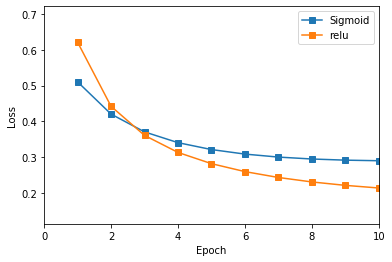

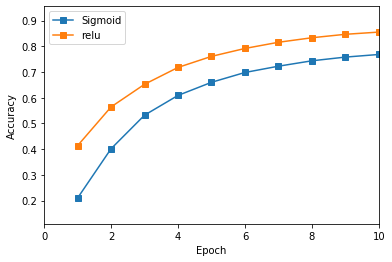

In [13]:
plot_loss_and_acc({'Sigmoid': [sigmoid_loss, sigmoid_acc],
                   'relu': [relu_loss, relu_acc]})

## 2. MLP with Softmax Cross-Entropy Loss
In part-2, you need to train a MLP with **Softmax Cross-Entropy Loss**.  
**Sigmoid Activation Function** and **ReLU Activation Function** will be used respectively again.
### TODO
Before executing the following code, you should complete **criterion/softmax_cross_entropy_loss.py**.

In [14]:
from criterion import SoftmaxCrossEntropyLossLayer

criterion = SoftmaxCrossEntropyLossLayer()

sgd = SGD(learning_rate_SGD, weight_decay)

## 2.1 MLP with Softmax Cross-Entropy Loss and Sigmoid Activation Function
Build and train a MLP contraining one hidden layer with 128 units using Sigmoid activation function and Softmax cross-entropy loss function.

In [15]:
sigmoidMLP = Network()
# Build MLP with FCLayer and SigmoidLayer
# 128 is the number of hidden units, you can change by your own
sigmoidMLP.add(FCLayer(784, 128))
sigmoidMLP.add(SigmoidLayer())
sigmoidMLP.add(FCLayer(128, 10))

### Train

In [16]:
sigmoidMLP, sigmoid_loss, sigmoid_acc = train(sigmoidMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Epoch [0][10]	 Batch [0][550]	 Training Loss 2.6216	 Accuracy 0.1100
Epoch [0][10]	 Batch [50][550]	 Training Loss 2.5924	 Accuracy 0.0904
Epoch [0][10]	 Batch [100][550]	 Training Loss 2.5555	 Accuracy 0.0952
Epoch [0][10]	 Batch [150][550]	 Training Loss 2.5213	 Accuracy 0.0979
Epoch [0][10]	 Batch [200][550]	 Training Loss 2.4944	 Accuracy 0.1012
Epoch [0][10]	 Batch [250][550]	 Training Loss 2.4727	 Accuracy 0.1010
Epoch [0][10]	 Batch [300][550]	 Training Loss 2.4527	 Accuracy 0.1021
Epoch [0][10]	 Batch [350][550]	 Training Loss 2.4362	 Accuracy 0.1035
Epoch [0][10]	 Batch [400][550]	 Training Loss 2.4220	 Accuracy 0.1049
Epoch [0][10]	 Batch [450][550]	 Training Loss 2.4097	 Accuracy 0.1055
Epoch [0][10]	 Batch [500][550]	 Training Loss 2.3975	 Accuracy 0.1074

Epoch [0]	 Average training loss 2.3865	 Average training accuracy 0.1102
Epoch [0]	 Average validation loss 2.2638	 Average validation accuracy 0.1578

Epoch [1][10]	 Batch [0][550]	 Training Loss 2.2599	 Accuracy 0.1500


Epoch [8]	 Average training loss 1.9214	 Average training accuracy 0.6744
Epoch [8]	 Average validation loss 1.8954	 Average validation accuracy 0.7192

Epoch [9][10]	 Batch [0][550]	 Training Loss 1.8902	 Accuracy 0.7500
Epoch [9][10]	 Batch [50][550]	 Training Loss 1.9095	 Accuracy 0.6865
Epoch [9][10]	 Batch [100][550]	 Training Loss 1.9082	 Accuracy 0.6832
Epoch [9][10]	 Batch [150][550]	 Training Loss 1.9094	 Accuracy 0.6793
Epoch [9][10]	 Batch [200][550]	 Training Loss 1.9105	 Accuracy 0.6779
Epoch [9][10]	 Batch [250][550]	 Training Loss 1.9099	 Accuracy 0.6793
Epoch [9][10]	 Batch [300][550]	 Training Loss 1.9085	 Accuracy 0.6795
Epoch [9][10]	 Batch [350][550]	 Training Loss 1.9107	 Accuracy 0.6774
Epoch [9][10]	 Batch [400][550]	 Training Loss 1.9102	 Accuracy 0.6791
Epoch [9][10]	 Batch [450][550]	 Training Loss 1.9112	 Accuracy 0.6791
Epoch [9][10]	 Batch [500][550]	 Training Loss 1.9110	 Accuracy 0.6796

Epoch [9]	 Average training loss 1.9105	 Average training accuracy 

### Test

In [17]:
test(sigmoidMLP, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.7041.



## 2.2 MLP with Softmax Cross-Entropy Loss and ReLU Activation Function
Build and train a MLP contraining one hidden layer with 128 units using ReLU activation function and Softmax cross-entropy loss function.

In [18]:
reluMLP = Network()
# Build ReLUMLP with FCLayer and ReLULayer
# 128 is the number of hidden units, you can change by your own
reluMLP.add(FCLayer(784, 128))
reluMLP.add(ReLULayer())
reluMLP.add(FCLayer(128, 10))

In [19]:
reluMLP, relu_loss, relu_acc = train(reluMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Epoch [0][10]	 Batch [0][550]	 Training Loss 2.5023	 Accuracy 0.1700
Epoch [0][10]	 Batch [50][550]	 Training Loss 2.4209	 Accuracy 0.1404
Epoch [0][10]	 Batch [100][550]	 Training Loss 2.3411	 Accuracy 0.1650
Epoch [0][10]	 Batch [150][550]	 Training Loss 2.2730	 Accuracy 0.1899
Epoch [0][10]	 Batch [200][550]	 Training Loss 2.2202	 Accuracy 0.2127
Epoch [0][10]	 Batch [250][550]	 Training Loss 2.1682	 Accuracy 0.2405
Epoch [0][10]	 Batch [300][550]	 Training Loss 2.1213	 Accuracy 0.2692
Epoch [0][10]	 Batch [350][550]	 Training Loss 2.0810	 Accuracy 0.2936
Epoch [0][10]	 Batch [400][550]	 Training Loss 2.0416	 Accuracy 0.3181
Epoch [0][10]	 Batch [450][550]	 Training Loss 2.0072	 Accuracy 0.3412
Epoch [0][10]	 Batch [500][550]	 Training Loss 1.9746	 Accuracy 0.3611

Epoch [0]	 Average training loss 1.9424	 Average training accuracy 0.3800
Epoch [0]	 Average validation loss 1.5509	 Average validation accuracy 0.6124

Epoch [1][10]	 Batch [0][550]	 Training Loss 1.5342	 Accuracy 0.6400


Epoch [8]	 Average training loss 0.8147	 Average training accuracy 0.8414
Epoch [8]	 Average validation loss 0.7321	 Average validation accuracy 0.8836

Epoch [9][10]	 Batch [0][550]	 Training Loss 0.7469	 Accuracy 0.8800
Epoch [9][10]	 Batch [50][550]	 Training Loss 0.7840	 Accuracy 0.8557
Epoch [9][10]	 Batch [100][550]	 Training Loss 0.7890	 Accuracy 0.8531
Epoch [9][10]	 Batch [150][550]	 Training Loss 0.7972	 Accuracy 0.8486
Epoch [9][10]	 Batch [200][550]	 Training Loss 0.8021	 Accuracy 0.8470
Epoch [9][10]	 Batch [250][550]	 Training Loss 0.7999	 Accuracy 0.8475
Epoch [9][10]	 Batch [300][550]	 Training Loss 0.7992	 Accuracy 0.8474
Epoch [9][10]	 Batch [350][550]	 Training Loss 0.8051	 Accuracy 0.8459
Epoch [9][10]	 Batch [400][550]	 Training Loss 0.8045	 Accuracy 0.8460
Epoch [9][10]	 Batch [450][550]	 Training Loss 0.8061	 Accuracy 0.8458
Epoch [9][10]	 Batch [500][550]	 Training Loss 0.8066	 Accuracy 0.8455

Epoch [9]	 Average training loss 0.8055	 Average training accuracy 

In [20]:
test(reluMLP, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.8595.



## Plot

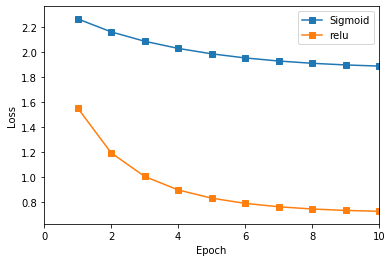

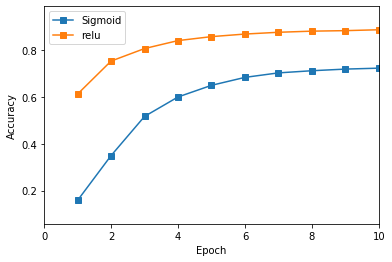

In [21]:
plot_loss_and_acc({'Sigmoid': [sigmoid_loss, sigmoid_acc],
                   'relu': [relu_loss, relu_acc]})

### ~~You have finished homework2-mlp, congratulations!~~  

**Next, according to the requirements 4) of report:**
### **You need to construct a two-hidden-layer MLP, using any activation function and loss function.**

**Note: Please insert some new cells blow (using '+' bottom in the toolbar) refer to above codes. Do not modify the former code directly.**

In [22]:
# NETWORK HYPER-PARAMETERS
batch_size = 100
max_epoch = 10 #20
init_std = 0.01

learning_rate_SGD = 0.001 #0.001
weight_decay = 0.1

disp_freq = 50

In [23]:
# LOSS CRITERIA
criterion = SoftmaxCrossEntropyLossLayer()

# OPTIMIZATION METHOD
sgd = SGD(learning_rate_SGD, weight_decay)

# CREATE NETWORK
reluMLP = Network()
reluMLP.add(FCLayer(784, 456))
reluMLP.add(ReLULayer())
reluMLP.add(FCLayer(456, 128))
reluMLP.add(ReLULayer())
reluMLP.add(FCLayer(128, 10))

In [24]:
# TRAIN NETWORK
reluMLP, relu_loss, relu_acc = train(reluMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Epoch [0][10]	 Batch [0][550]	 Training Loss 2.6287	 Accuracy 0.0800
Epoch [0][10]	 Batch [50][550]	 Training Loss 2.5262	 Accuracy 0.0859
Epoch [0][10]	 Batch [100][550]	 Training Loss 2.4006	 Accuracy 0.1226
Epoch [0][10]	 Batch [150][550]	 Training Loss 2.3123	 Accuracy 0.1614
Epoch [0][10]	 Batch [200][550]	 Training Loss 2.2393	 Accuracy 0.2017
Epoch [0][10]	 Batch [250][550]	 Training Loss 2.1759	 Accuracy 0.2395
Epoch [0][10]	 Batch [300][550]	 Training Loss 2.1160	 Accuracy 0.2762
Epoch [0][10]	 Batch [350][550]	 Training Loss 2.0701	 Accuracy 0.3055
Epoch [0][10]	 Batch [400][550]	 Training Loss 2.0208	 Accuracy 0.3357
Epoch [0][10]	 Batch [450][550]	 Training Loss 1.9799	 Accuracy 0.3608
Epoch [0][10]	 Batch [500][550]	 Training Loss 1.9396	 Accuracy 0.3853

Epoch [0]	 Average training loss 1.9005	 Average training accuracy 0.4084
Epoch [0]	 Average validation loss 1.4369	 Average validation accuracy 0.6840

Epoch [1][10]	 Batch [0][550]	 Training Loss 1.4448	 Accuracy 0.6900


Epoch [8]	 Average training loss 0.7580	 Average training accuracy 0.8570
Epoch [8]	 Average validation loss 0.6781	 Average validation accuracy 0.8972

Epoch [9][10]	 Batch [0][550]	 Training Loss 0.7091	 Accuracy 0.8900
Epoch [9][10]	 Batch [50][550]	 Training Loss 0.7343	 Accuracy 0.8702
Epoch [9][10]	 Batch [100][550]	 Training Loss 0.7392	 Accuracy 0.8666
Epoch [9][10]	 Batch [150][550]	 Training Loss 0.7477	 Accuracy 0.8610
Epoch [9][10]	 Batch [200][550]	 Training Loss 0.7507	 Accuracy 0.8600
Epoch [9][10]	 Batch [250][550]	 Training Loss 0.7490	 Accuracy 0.8605
Epoch [9][10]	 Batch [300][550]	 Training Loss 0.7488	 Accuracy 0.8612
Epoch [9][10]	 Batch [350][550]	 Training Loss 0.7551	 Accuracy 0.8600
Epoch [9][10]	 Batch [400][550]	 Training Loss 0.7546	 Accuracy 0.8605
Epoch [9][10]	 Batch [450][550]	 Training Loss 0.7565	 Accuracy 0.8602
Epoch [9][10]	 Batch [500][550]	 Training Loss 0.7576	 Accuracy 0.8594

Epoch [9]	 Average training loss 0.7569	 Average training accuracy 

In [25]:
# TEST NETWORK
test(reluMLP, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.8728.

